<a href="https://colab.research.google.com/github/pp1e/omnissiah/blob/main/media_campaign_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
train_df = pd.read_csv('train.csv')

## 1. Описание признаков

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

*Таблица 1 - Описание признаков исходного датасета*

|Признак|Описание|Тип данных|Категориальный|
|-------|--------|----------|--------------|
|`id`|Уникальный идентификатор для каждой записи|int64|Нет|
|`store_sales(in millions)`|Продажи в магазине в миллионах долларов| float64|Нет|
|`unit_sales(in millions)`|Объем продаж в миллионах единиц в магазине| float64|Нет|
|`total_children`|Общее количество детей|float64| Нет|
|`num_children_at_home`|Количество детей, проживающих дома, по данным, предоставленным клиентами|float64|Нет|
|`avg_cars_at home(approx)`|Среднее количество автомобилей|float64|Нет|
|`gross_weight`|Общий вес товара|float64|Нет|
|`recyclable_package`|Указывает, является ли упаковка товара перерабатываемой (0 или 1)|float64|Да|
|`low_fat`|Указывает, является ли продукт низкокалорийным (0 или 1)| float64|Да|
|`units_per_case`|Количество единиц в упаковке, доступных на полках магазина|float64|Нет|
|`store_sqft`|Площадь магазина в квадратных футах|float64|Нет|
|`coffee_bar`|Указывает, есть ли в магазине кофейня (0 или 1)|float64|Да|
|`video_store`|Указывает, есть ли в магазине видеомагазин или игровая зона (0 или 1)|float64|Да|
|`salad_bar`|Указывает, есть ли в магазине салат-бар (0 или 1)| float64| Да|
|`prepared_food`|Указывает, доступна ли в магазине готовая еда (0 или 1)| float64|Да|
|`florist`|Указывает, есть ли в магазине цветочный отдел (0 или 1)| float64|Да|
|`cost`|Стоимость привлечения клиента в долларах|float64|Нет|

**cost - целевая переменная (target)**

In [11]:
train_df.head(10)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
5,5,9.08,4.0,5.0,5.0,3.0,7.26,0.0,1.0,5.0,33858.0,1.0,0.0,1.0,1.0,1.0,142.58
6,6,4.80,2.0,1.0,0.0,2.0,9.58,0.0,0.0,6.0,27694.0,1.0,1.0,1.0,1.0,1.0,69.47
7,7,4.29,3.0,2.0,0.0,2.0,16.90,1.0,0.0,2.0,23688.0,1.0,1.0,1.0,1.0,1.0,68.84
8,8,8.55,3.0,5.0,0.0,2.0,13.80,1.0,0.0,6.0,38382.0,0.0,0.0,0.0,0.0,0.0,87.07
9,9,3.08,4.0,1.0,0.0,3.0,15.70,1.0,1.0,9.0,27694.0,1.0,1.0,1.0,1.0,1.0,80.29


## 2.Анализ данных

In [12]:
train_df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [14]:
train_df.shape

(360336, 17)

## 3. Поиск пропусков

In [15]:
# Проверка на пропуски
missing_values = train_df.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_percentage = (missing_values / len(train_df)) * 100  # Процент пропущенных значений для каждого столбца

# Создаем таблицу с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент пропусков': missing_percentage})

# Выводим столбцы, где есть пропуски
missing_data = missing_data[missing_data['Количество пропусков'] > 0]
display(missing_data)

,Количество пропусков,Процент пропусков


## 5. Поиск категориальных признаков

In [16]:
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: []


## 7. Нормализация методом Min-Max

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Выбираем числовые признаки для нормализации
numeric_features = train_df.select_dtypes(include=['int', 'float']).columns

# 1. Min-Max Scaling
scaler_min_max = MinMaxScaler()
df_min_max_scaled = train_df.copy()
df_min_max_scaled[numeric_features] = scaler_min_max.fit_transform(train_df[numeric_features])
print("Данные после Min-Max нормализации:")
display(df_min_max_scaled.head())

Данные после Min-Max нормализации:


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0.000000,0.361446,0.4,0.4,0.4,0.50,0.270440,1.0,0.0,0.885714,0.835527,0.0,0.0,0.0,0.0,0.0,0.114188
1,0.000003,0.200357,0.2,0.8,0.0,0.75,0.041509,1.0,0.0,0.000000,0.407029,1.0,0.0,0.0,0.0,0.0,0.717563
2,0.000006,0.605533,0.6,0.0,0.0,0.75,0.962264,1.0,0.0,0.714286,0.046240,1.0,0.0,0.0,0.0,0.0,0.330639
3,0.000008,0.156627,0.4,1.0,0.0,0.00,0.553459,0.0,1.0,1.000000,0.046240,1.0,0.0,0.0,0.0,0.0,0.161580
4,0.000011,0.072289,0.4,1.0,0.0,0.75,0.691824,1.0,1.0,0.542857,0.380606,1.0,1.0,1.0,1.0,1.0,0.613581


## 8. Новые признаки

In [36]:
df_min_max_scaled['price_per_unit'] = df_min_max_scaled['store_sales(in millions)'] / df_min_max_scaled['unit_sales(in millions)']
df_min_max_scaled['low_fat_ratio'] = df_min_max_scaled['low_fat'] / df_min_max_scaled['units_per_case']
df_min_max_scaled['children_ratio'] = df_min_max_scaled['num_children_at_home'] / df_min_max_scaled['total_children']
df_min_max_scaled['weight_per_unit'] = df_min_max_scaled['gross_weight'] / df_min_max_scaled['units_per_case']
df_min_max_scaled.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,...,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,price_per_unit,low_fat_ratio,children_ratio,weight_per_unit
0,0.000000,0.361446,0.4,0.4,0.4,0.50,0.270440,1.0,0.0,0.885714,...,0.0,0.0,0.0,0.0,0.0,0.114188,0.903614,0.000000,1.0,0.305336
1,0.000003,0.200357,0.2,0.8,0.0,0.75,0.041509,1.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.717563,1.001785,NaN,0.0,inf
2,0.000006,0.605533,0.6,0.0,0.0,0.75,0.962264,1.0,0.0,0.714286,...,1.0,0.0,0.0,0.0,0.0,0.330639,1.009222,0.000000,NaN,1.347170
3,0.000008,0.156627,0.4,1.0,0.0,0.00,0.553459,0.0,1.0,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.161580,0.391566,1.000000,0.0,0.553459
4,0.000011,0.072289,0.4,1.0,0.0,0.75,0.691824,1.0,1.0,0.542857,...,1.0,1.0,1.0,1.0,1.0,0.613581,0.180723,1.842105,0.0,1.274412


## Проверка на пропуски и замена на среднее

In [ ]:

# Проверка на пропуски
missing_values = df_min_max_scaled.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_percentage = (missing_values / len(df_min_max_scaled)) * 100  # Процент пропущенных значений для каждого столбца

# Создаем таблицу с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент пропусков': missing_percentage})

# Выводим столбцы, где есть пропуски
missing_data = missing_data[missing_data['Количество пропусков'] > 0]
display(missing_data)

# Замена пропущенных значений на среднее по каждому столбцу
df_min_max_scaled.fillna(df_min_max_scaled.mean(), inplace=True)

# Проверка, были ли заменены пропуски
missing_values_after_fill = df_min_max_scaled.isnull().sum()
print("После замены пропусков:")
print(missing_values_after_fill)




,Количество пропусков,Процент пропусков
price_per_unit,4,0.001110
low_fat_ratio,5030,1.395919
children_ratio,36441,10.113061


После замены пропусков:
id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
price_per_unit                0
low_fat_ratio                 0
children_ratio                0
weight_per_unit               0
dtype: int64


## Отбор сгенерированных признаков

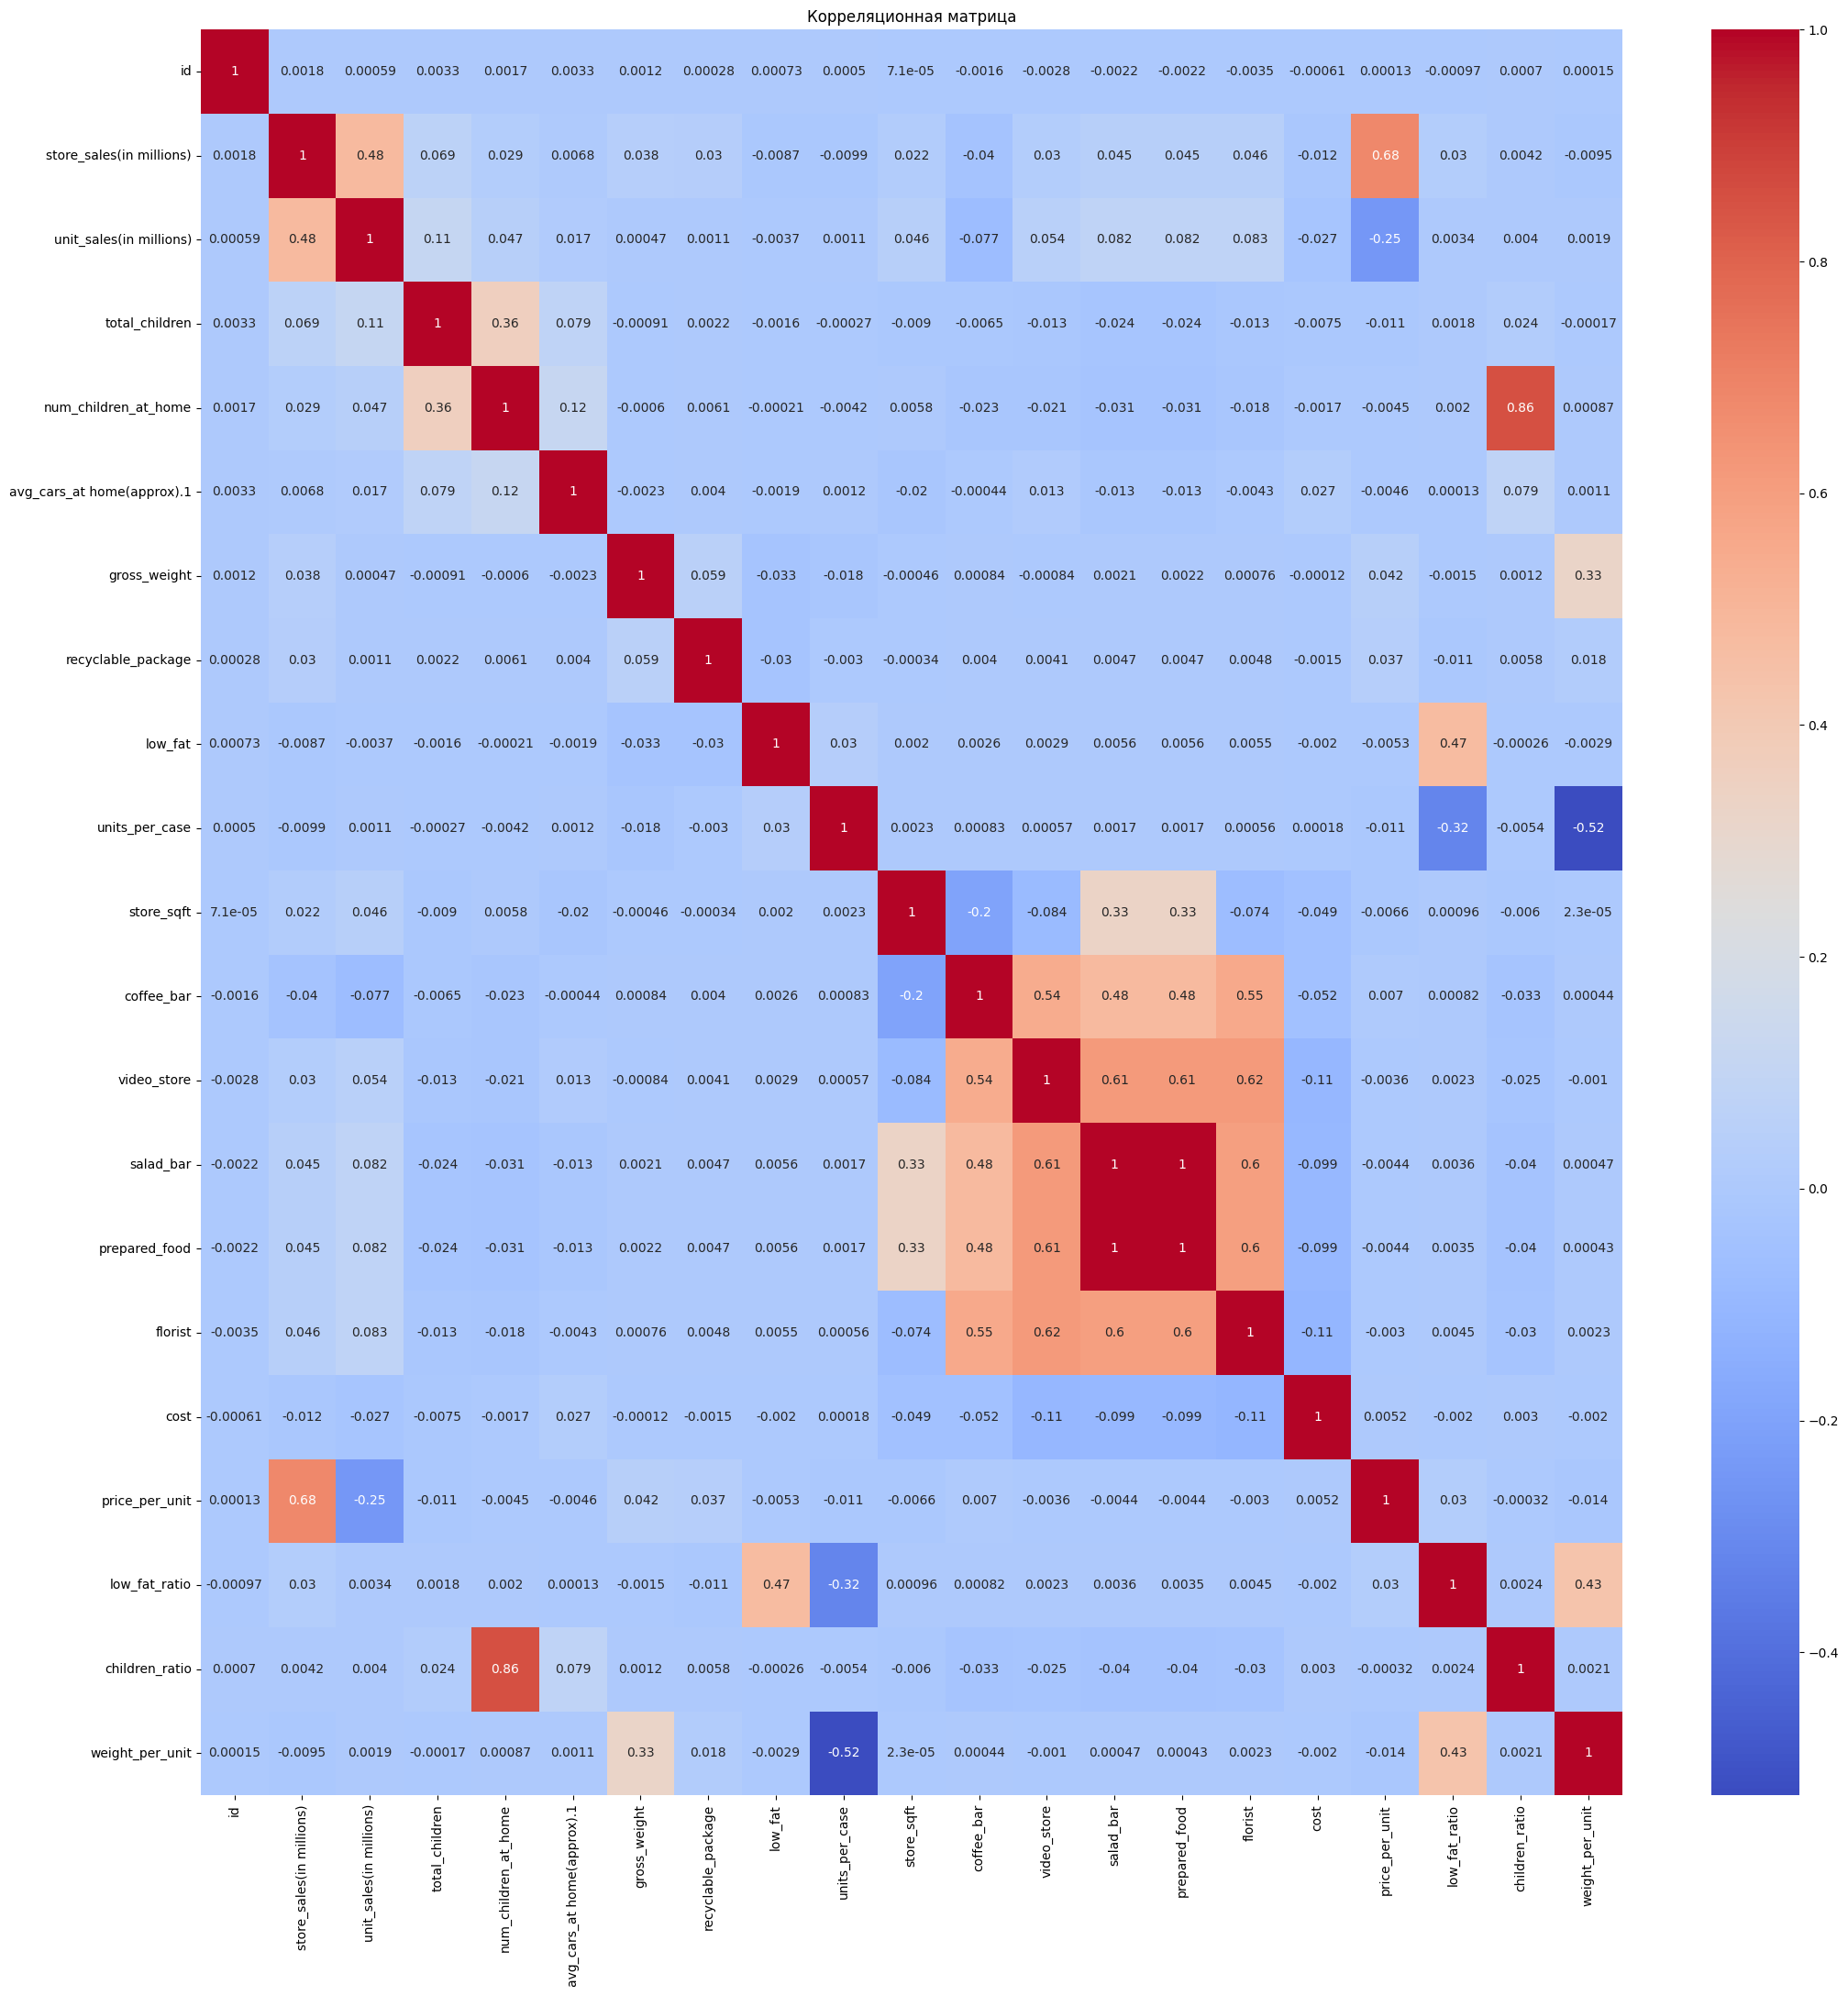

Признаки по значимости (корреляции с 'cost'):
cost                          1.000000
florist                       0.110414
video_store                   0.106786
prepared_food                 0.098843
salad_bar                     0.098810
coffee_bar                    0.052086
store_sqft                    0.049201
avg_cars_at home(approx).1    0.027098
unit_sales(in millions)       0.026509
store_sales(in millions)      0.012387
total_children                0.007482
price_per_unit                0.005172
children_ratio                0.002953
weight_per_unit               0.001999
low_fat                       0.001975
low_fat_ratio                 0.001962
num_children_at_home          0.001727
recyclable_package            0.001455
id                            0.000611
units_per_case                0.000180
gross_weight                  0.000116
Name: cost, dtype: float64


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционная матрица для оценки значимости
plt.figure(figsize=(25, 25))
sns.heatmap(df_min_max_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

# Сортировка признаков по их корреляции с целевой переменной 'cost'
corr_with_target = df_min_max_scaled.corr()['cost'].abs().sort_values(ascending=False)
print("Признаки по значимости (корреляции с 'cost'):")
print(corr_with_target)
